# PROPHET TEST1

In [1]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 KB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 85.3 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730985 sha256=23ef8bcfed491e572c92449bfe8cde50589073c8523beb6b507535aa403772b0
  Stored in directory: /root/.cache/pip/wheels/33/3d/82/4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
Successfully built pymeeus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("banjir-clean.csv")
df.head()

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.73835,-6.19933


In [5]:
import json
result = []
lst_data = list(df['report_dat'])
for i in lst_data:
  conv = str(i)
  proses = json.loads(conv)
  result.append(proses)

In [6]:
result

[{'report_type': 'flood', 'flood_depth': 30},
 {'points': 1, 'flood_depth': 80, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 51, 'report_type': 'flood'},
 {'points': 2, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 60},
 {'report_type': 'flood', 'flood_depth': 39},
 {'report_type': 'flood', 'flood_depth': 79},
 {'report_type': 'flood', 'flood_depth': 116},
 {'report_type': 'flood', 'flood_depth': 60},
 {'points': 1},
 {'report_type': 'flood', 'flood_depth': 81},
 {'report_type': 'flood', 'flood_depth': 69},
 {'points': 1, 'flood_depth': 195, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 44},
 {'points': 1, 'flood_depth': 93, 'report_type': 'flood'},
 {'points': -1, 'flood_depth': 101, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 190},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_ty

In [7]:
y = pd.DataFrame(result)
y

,report_type,flood_depth,points,structureFailure,accessabilityFailure,condition,impact,fireDistance,fireLocation,personLocation,fireRadius,volcanicSigns,evacuationNumber,evacuationArea,visibility,airQuality
0,flood,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,flood,80.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,flood,51.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,flood,100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flood,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,flood,68.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,flood,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3040,flood,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3041,flood,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
y = y[['report_type', 'flood_depth']]
y

,report_type,flood_depth
0,flood,30.0
1,flood,80.0
2,flood,51.0
3,flood,100.0
4,flood,60.0
...,...,...
3038,flood,68.0
3039,flood,103.0
3040,flood,54.0
3041,flood,19.0


In [9]:
z = pd.concat([df, y], axis=1, join='inner')
z

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,report_type,flood_depth
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,flood,30.0
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,flood,80.0
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,flood,51.0
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,flood,100.0
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,flood,68.0
3039,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,flood,103.0
3040,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,flood,54.0
3041,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,flood,19.0


In [10]:
z = z[z['report_type'].notna() & z['flood_depth'].notna() & z['date'].notna()]
z

,date,time,source,status,disaster_type,report_dat,tags,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,report_type,flood_depth
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,flood,30.0
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,flood,80.0
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,flood,51.0
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,flood,100.0
4,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }","{ ""district_id"": ""3174"", ""local_area_id"": ""220...",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,flood,68.0
3039,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,flood,103.0
3040,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,flood,54.0
3041,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,flood,19.0


In [11]:
z = z[['date', 'disaster_type', 'flood_depth']]
z = z [['date', 'flood_depth']]

In [12]:
z.columns = ['ds', 'y']
z

,ds,y
0,01/01/2020,30.0
1,01/01/2020,80.0
2,01/01/2020,51.0
3,01/01/2020,100.0
4,01/01/2020,60.0
...,...,...
3038,28/12/2021,68.0
3039,28/12/2021,103.0
3040,28/12/2021,54.0
3041,28/12/2021,19.0


In [13]:
#z['ds'] = pd.to_datetime(z['ds'])
#z

In [14]:
z['ds'] = pd.to_datetime(z['ds'])
z = z.set_index('ds') 
grouped_dat = z.y.resample('m').mean()


In [15]:
grouped_dat

ds
2020-01-31    59.302083
2020-02-29    56.142319
2020-03-31    59.850746
2020-04-30    62.052632
2020-05-31    47.113208
2020-06-30    73.678571
2020-07-31    66.098765
2020-08-31    45.455696
2020-09-30    46.266667
2020-10-31    65.000000
2020-11-30    67.000000
2020-12-31    54.535714
2021-01-31    71.939759
2021-02-28    68.268722
2021-03-31    74.923077
2021-04-30    67.657895
2021-05-31    59.781250
2021-06-30    52.326531
2021-07-31    48.323077
2021-08-31    66.450980
2021-09-30    69.868852
2021-10-31    63.321429
2021-11-30    56.942857
2021-12-31    59.909091
Freq: M, Name: y, dtype: float64

In [16]:
final_dat = grouped_dat.to_frame()

In [17]:
final_dat

,y
ds,
2020-01-31,59.302083
2020-02-29,56.142319
2020-03-31,59.850746
2020-04-30,62.052632
2020-05-31,47.113208
2020-06-30,73.678571
2020-07-31,66.098765
2020-08-31,45.455696
2020-09-30,46.266667


In [18]:
final_dat['ds'] = final_dat.index

In [19]:
final_dat

,y,ds
ds,,
2020-01-31,59.302083,2020-01-31
2020-02-29,56.142319,2020-02-29
2020-03-31,59.850746,2020-03-31
2020-04-30,62.052632,2020-04-30
2020-05-31,47.113208,2020-05-31
2020-06-30,73.678571,2020-06-30
2020-07-31,66.098765,2020-07-31
2020-08-31,45.455696,2020-08-31
2020-09-30,46.266667,2020-09-30


In [20]:
import matplotlib.pyplot as plt
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5dbd2641c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5dbd264760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5dbd24afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5dbd264d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5dbd264fd0>],
 'means': []}

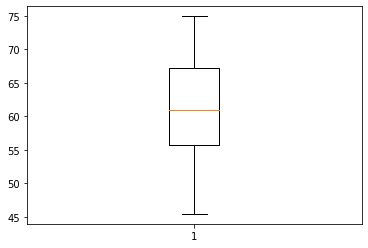

In [21]:
plt.boxplot(final_dat['y'])

<AxesSubplot:xlabel='ds'>

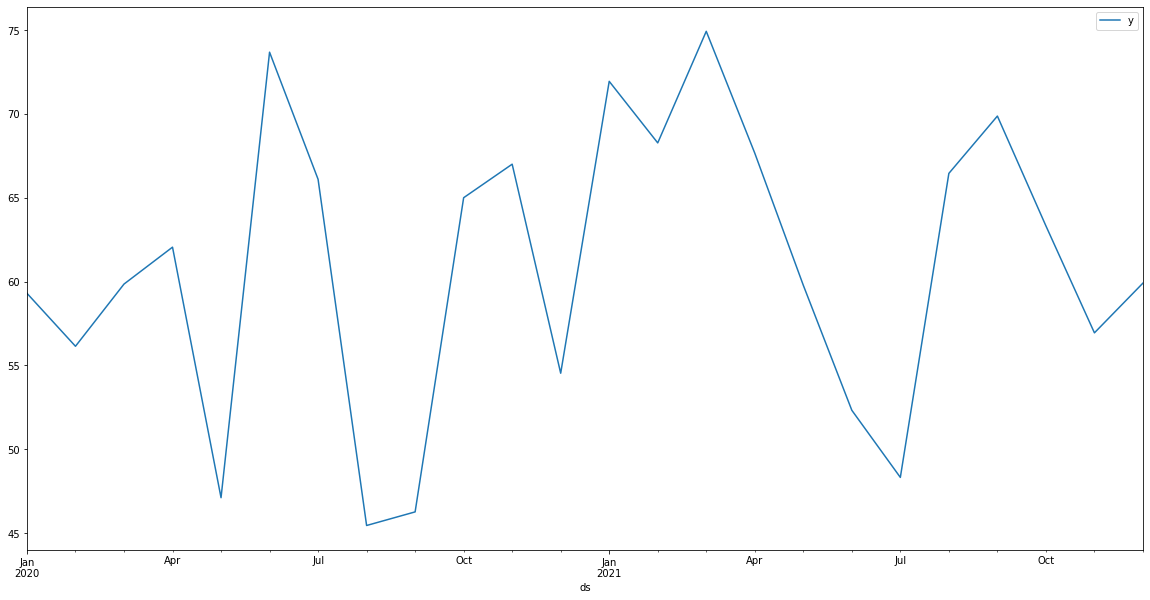

In [22]:
final_dat.plot(x='ds', y='y', figsize = (20, 10))



In [23]:
len(final_dat)

24

In [24]:
train = final_dat.iloc[:-12]
test = final_dat.iloc[-12:]

In [25]:
train.shape
test.shape

(12, 2)

In [26]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)

17:24:40 - cmdstanpy - INFO - Chain [1] start processing
17:24:40 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,58.741346,48.155388,69.960920,58.741346,58.741346,0.0,0.0,0.0,0.0,0.0,0.0,58.741346
1,2020-02-29,58.706214,46.996997,69.706561,58.706214,58.706214,0.0,0.0,0.0,0.0,0.0,0.0,58.706214
2,2020-03-31,58.668659,47.767600,70.168449,58.668659,58.668659,0.0,0.0,0.0,0.0,0.0,0.0,58.668659
3,2020-04-30,58.632315,47.755861,70.242623,58.632315,58.632315,0.0,0.0,0.0,0.0,0.0,0.0,58.632315
4,2020-05-31,58.594760,48.112382,70.007047,58.594760,58.594760,0.0,0.0,0.0,0.0,0.0,0.0,58.594760


In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-31,58.741346,48.155388,69.960920
1,2020-02-29,58.706214,46.996997,69.706561
2,2020-03-31,58.668659,47.767600,70.168449
3,2020-04-30,58.632315,47.755861,70.242623
4,2020-05-31,58.594760,48.112382,70.007047


## Hasil Forecast PetaBencana

In [29]:
plot_plotly(m, forecast)

In [30]:
plot_components_plotly(m, forecast)

# PROPHET TEST 2

In [31]:
import pandas as pd

In [32]:
df2 = pd.read_csv("FixBanjir-2017-2020.csv")
df2.head()

,bulan,kecamatan,kelurahan,kk_terdampak,tahun,min_ketinggian,max_ketinggian,avg_ketinggian
0,1,4,5,0,2017,10,70,40.0
1,2,31,67,6967,2017,10,250,130.0
2,3,20,40,3232,2017,0,160,80.0
3,4,19,33,621,2017,10,200,105.0
4,5,15,25,1056,2017,5,120,62.5


In [33]:
df2['date'] = "28/" + df2.bulan.map(str) + "/" + df2.tahun.map(str)
df2

,bulan,kecamatan,kelurahan,kk_terdampak,tahun,min_ketinggian,max_ketinggian,avg_ketinggian,date
0,1,4,5,0,2017,10,70,40.0,28/1/2017
1,2,31,67,6967,2017,10,250,130.0,28/2/2017
2,3,20,40,3232,2017,0,160,80.0,28/3/2017
3,4,19,33,621,2017,10,200,105.0,28/4/2017
4,5,15,25,1056,2017,5,120,62.5,28/5/2017
5,6,4,5,1409,2017,10,110,60.0,28/6/2017
6,7,6,8,251,2017,10,80,45.0,28/7/2017
7,8,5,6,0,2017,10,80,45.0,28/8/2017
8,9,1,1,0,2017,10,80,45.0,28/9/2017
9,10,8,11,15,2017,10,105,57.5,28/10/2017


In [34]:
df2 = df2[['date', 'avg_ketinggian']]
df2

,date,avg_ketinggian
0,28/1/2017,40.0
1,28/2/2017,130.0
2,28/3/2017,80.0
3,28/4/2017,105.0
4,28/5/2017,62.5
5,28/6/2017,60.0
6,28/7/2017,45.0
7,28/8/2017,45.0
8,28/9/2017,45.0
9,28/10/2017,57.5


In [35]:
df2.index = df2['date']
df2

,date,avg_ketinggian
date,,
28/1/2017,28/1/2017,40.0
28/2/2017,28/2/2017,130.0
28/3/2017,28/3/2017,80.0
28/4/2017,28/4/2017,105.0
28/5/2017,28/5/2017,62.5
28/6/2017,28/6/2017,60.0
28/7/2017,28/7/2017,45.0
28/8/2017,28/8/2017,45.0
28/9/2017,28/9/2017,45.0


In [36]:
df2['date'] = pd.to_datetime(df2['date'])
df2

/tmp/ipykernel_69/619026959.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,avg_ketinggian
date,,
28/1/2017,2017-01-28,40.0
28/2/2017,2017-02-28,130.0
28/3/2017,2017-03-28,80.0
28/4/2017,2017-04-28,105.0
28/5/2017,2017-05-28,62.5
28/6/2017,2017-06-28,60.0
28/7/2017,2017-07-28,45.0
28/8/2017,2017-08-28,45.0
28/9/2017,2017-09-28,45.0


In [37]:
df2.columns = ['ds', 'y']

<AxesSubplot:xlabel='ds'>

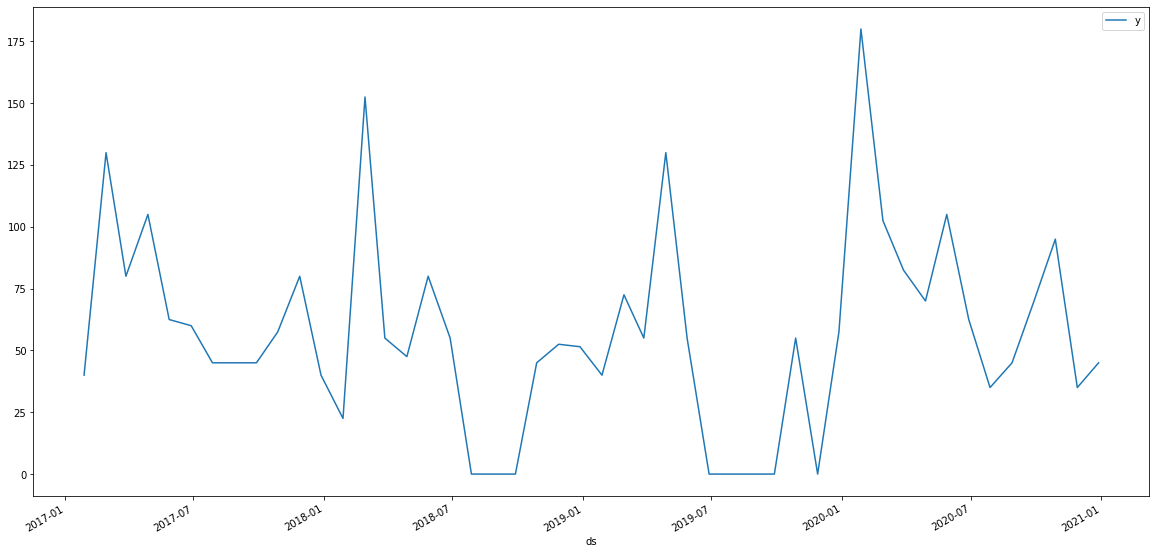

In [38]:
df2.plot(x='ds', y='y', figsize = (20, 10))


In [39]:
len(df2)

48

In [40]:
train = df2.iloc[:-12]
test = df2.iloc[-12:]

In [41]:
m = Prophet(changepoint_prior_scale=0.001)
m.fit(train)
future = m.make_future_dataframe(periods=36, freq='MS')
future['cap'] = 200
future['floor'] = 0
forecast = m.predict(future)

17:24:44 - cmdstanpy - INFO - Chain [1] start processing
17:24:44 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-28,56.332737,200,19.301970,59.113294,56.332737,56.332737,-17.509445,-17.509445,-17.509445,-17.509445,-17.509445,-17.509445,0.0,0.0,0.0,38.823292
1,2017-02-28,55.152529,200,134.503301,174.084378,55.152529,55.152529,100.106368,100.106368,100.106368,100.106368,100.106368,100.106368,0.0,0.0,0.0,155.258896
2,2017-03-28,54.086534,200,66.189176,103.169687,54.086534,54.086534,29.736874,29.736874,29.736874,29.736874,29.736874,29.736874,0.0,0.0,0.0,83.823408
3,2017-04-28,52.906325,200,67.895395,104.239452,52.906325,52.906325,33.273659,33.273659,33.273659,33.273659,33.273659,33.273659,0.0,0.0,0.0,86.179984
4,2017-05-28,51.764187,200,51.951729,89.645939,51.764187,51.764187,18.513847,18.513847,18.513847,18.513847,18.513847,18.513847,0.0,0.0,0.0,70.278034


In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-28,38.823292,19.301970,59.113294
1,2017-02-28,155.258896,134.503301,174.084378
2,2017-03-28,83.823408,66.189176,103.169687
3,2017-04-28,86.179984,67.895395,104.239452
4,2017-05-28,70.278034,51.951729,89.645939


## Hasil Forecast Banjir 2017-2020

In [44]:
plot_plotly(m, forecast)

In [45]:
plot_components_plotly(m, forecast)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=710a6a84-10eb-4985-ad13-f530a8f09e49' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>